****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew

In [2]:
#data_frame = pd.read_csv('test.csv')
data_frame = pd.read_csv('WDOU18_2018-08-01_2018-08-30.csv')

In [3]:
data_frame.count()

Start                            11341
End                              11341
BuyOffersAmount                  11341
SellOffersAmount                 11341
NegociatedOffersAmount           11341
MediumPrice                      11341
MaxBuyOffer                      11341
MinBuyOffer                      11341
MaxSellOffer                     11341
MinSellOffer                     11341
TotalTradedQuantity              11341
RSIIndicator                     11341
FirstTradePrice                  11341
OpenPrice                        11341
ClosePrice                       11341
SMAIndicator                     11341
EMAIndicator                     11341
UpperBollingerBand               11341
LowerBollingerBand               11341
MiddleBollingerBand              11341
NormalizedClosePrice             11341
NormalizedMediumPrice            11341
NormalizedOpenPrice              11341
NormalizedSMAIndicator           11341
NormalizedEMAIndicator           11341
NormalizedUpperBollingerB

In [4]:
train_y = data_frame['BuySignal']
train_x = data_frame.drop(['BuySignal'], axis=1)

In [5]:
train_x.count()

Start                            11341
End                              11341
BuyOffersAmount                  11341
SellOffersAmount                 11341
NegociatedOffersAmount           11341
MediumPrice                      11341
MaxBuyOffer                      11341
MinBuyOffer                      11341
MaxSellOffer                     11341
MinSellOffer                     11341
TotalTradedQuantity              11341
RSIIndicator                     11341
FirstTradePrice                  11341
OpenPrice                        11341
ClosePrice                       11341
SMAIndicator                     11341
EMAIndicator                     11341
UpperBollingerBand               11341
LowerBollingerBand               11341
MiddleBollingerBand              11341
NormalizedClosePrice             11341
NormalizedMediumPrice            11341
NormalizedOpenPrice              11341
NormalizedSMAIndicator           11341
NormalizedEMAIndicator           11341
NormalizedUpperBollingerB

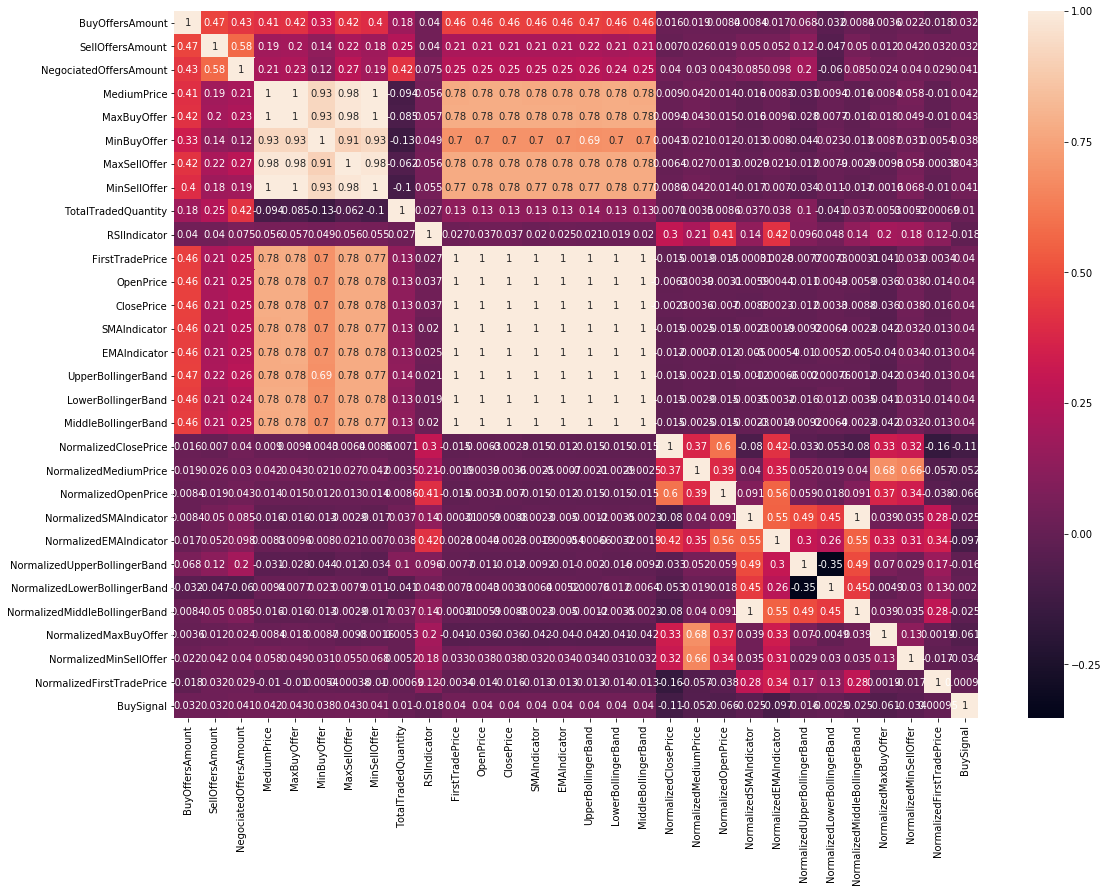

In [6]:
temp = data_frame

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [7]:
#data_frame["TotalTradedQuantity"].head()
data_frame.head()

,Start,End,BuyOffersAmount,SellOffersAmount,NegociatedOffersAmount,MediumPrice,MaxBuyOffer,MinBuyOffer,MaxSellOffer,MinSellOffer,...,NormalizedOpenPrice,NormalizedSMAIndicator,NormalizedEMAIndicator,NormalizedUpperBollingerBand,NormalizedLowerBollingerBand,NormalizedMiddleBollingerBand,NormalizedMaxBuyOffer,NormalizedMinSellOffer,NormalizedFirstTradePrice,BuySignal
0,8/1/18 9:14:00 AM,8/1/18 9:19:00 AM,42931,22822,7124,3776.50,3827.0,3720.5,3885.0,3726.0,...,0.5000,0.999981,0.999650,0.999600,1.000000,0.999981,0.263158,1.0000,0.000000,1
1,8/1/18 9:15:00 AM,8/1/18 9:20:00 AM,42904,23964,7242,3776.25,3826.5,3600.0,3885.0,3726.0,...,0.2500,0.999868,0.999538,0.999306,0.999972,0.999868,0.142857,1.0000,0.571429,0
2,8/1/18 9:16:00 AM,8/1/18 9:21:00 AM,38444,20774,5960,3775.25,3824.5,3600.0,3885.0,3726.0,...,0.3125,0.999735,0.999458,0.999103,0.999964,0.999735,0.000000,0.5625,1.000000,0
3,8/1/18 9:17:00 AM,8/1/18 9:22:00 AM,38213,19955,5838,3777.75,3834.0,3600.0,3885.0,3721.5,...,0.0625,0.999594,0.999495,0.999013,0.999893,0.999594,0.678571,0.0000,0.250000,0
4,8/1/18 9:18:00 AM,8/1/18 9:23:00 AM,35653,18632,5396,3777.75,3834.0,3600.0,3885.0,3721.5,...,0.4000,0.999537,0.999580,0.999059,0.999904,0.999537,0.678571,0.0000,0.466667,0


In [8]:
from pandas import Series
from sklearn.preprocessing import StandardScaler
from math import sqrt
series = Series((data_frame['BuyOffersAmount']).values, index=data_frame['Start'])
values = series.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
normalized = scaler.transform(values)
inversed = scaler.inverse_transform(normalized)
data_frame['BuyOffersAmount'] = normalized

series = Series((data_frame['SellOffersAmount']).values, index=data_frame['Start'])
values = series.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
normalized = scaler.transform(values)
inversed = scaler.inverse_transform(normalized)
data_frame['SellOffersAmount'] = normalized

series = Series((data_frame['NegociatedOffersAmount']).values, index=data_frame['Start'])
values = series.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
normalized = scaler.transform(values)
inversed = scaler.inverse_transform(normalized)
data_frame['NegociatedOffersAmount'] = normalized

series = Series((data_frame['TotalTradedQuantity']).values, index=data_frame['Start'])
values = series.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
normalized = scaler.transform(values)
inversed = scaler.inverse_transform(normalized)
data_frame['TotalTradedQuantity'] = normalized

/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lschlee/.conda/envs/stock-anal

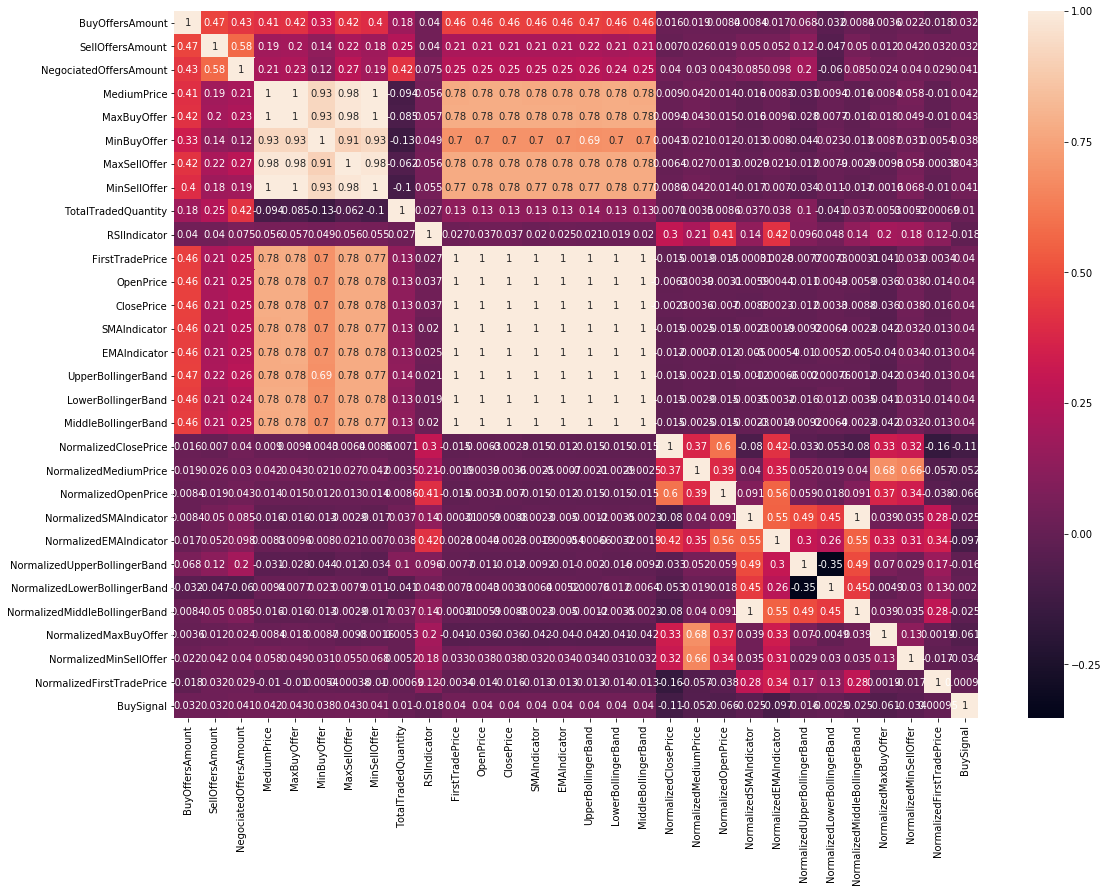

In [9]:
temp = data_frame

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
x_arr = ["BuyOffersAmount","SellOffersAmount","NegociatedOffersAmount","RSIIndicator","TotalTradedQuantity","NormalizedClosePrice","NormalizedMediumPrice","NormalizedOpenPrice","NormalizedSMAIndicator","NormalizedEMAIndicator","NormalizedUpperBollingerBand","NormalizedLowerBollingerBand","NormalizedMiddleBollingerBand","NormalizedMaxBuyOffer","NormalizedMinSellOffer","NormalizedFirstTradePrice"]
x_train = data_frame[x_arr]
y_train = data_frame["BuySignal"]

In [12]:
clf = MLPClassifier()
clf.fit(x_train, y_train)

/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [13]:
test_df = pd.read_csv('WDOU18_2018-08-31_2018-08-31.csv')
original_y = test_df['BuySignal']


In [14]:
series = Series((test_df['BuyOffersAmount']).values, index=test_df['Start'])
values = series.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
normalized = scaler.transform(values)
inversed = scaler.inverse_transform(normalized)
test_df['BuyOffersAmount'] = normalized

series = Series((test_df['SellOffersAmount']).values, index=test_df['Start'])
values = series.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
normalized = scaler.transform(values)
inversed = scaler.inverse_transform(normalized)
test_df['SellOffersAmount'] = normalized

series = Series((test_df['NegociatedOffersAmount']).values, index=test_df['Start'])
values = series.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
normalized = scaler.transform(values)
inversed = scaler.inverse_transform(normalized)
test_df['NegociatedOffersAmount'] = normalized

series = Series((test_df['TotalTradedQuantity']).values, index=test_df['Start'])
values = series.values
values = values.reshape((len(values), 1))
scaler = StandardScaler()
scaler = scaler.fit(values)
normalized = scaler.transform(values)
inversed = scaler.inverse_transform(normalized)
test_df['TotalTradedQuantity'] = normalized

test_df = test_df[x_arr]
y_test_df = clf.predict(test_df)

/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lschlee/.conda/envs/stock-analysis/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/lschlee/.conda/envs/stock-anal

In [15]:
y_test_df

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
original_y.values

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,

In [18]:
clf.score(test_df, original_y)

0.6220806794055201